# Лабораторная работа 2. Методы поиска

### Вариант: **13**

## Задание 1. Поиск корней уравнений. Метод дихотомии. (Задача 6)

***В рамках задачи по поиску корней уравнений метод бисекции и метод дихотомии синонимичны.***

***=> Рассматриваемый далее алгоритм аналогичен алгоритму метода бисекции.***

### Теоретическое описание алгоритма поиска корня уравнения

Метод бисекции/дихотомии основывается на принципе деления отрезка пополам и поиске корня уравнения в каждой из полученных половин.
##### Алгоритм метода:

   1. Задать начальный интервал, на котором будет производиться поиск корня уравнения.
   2. Пока длина текущего интервала больше заданной точности, выполнять следующие шаги:
        1. Находим середину отрезка $[a, b]$: $c = \dfrac{a + b}{2}$.
        2. Вычисляем значения функции в точках $a$, $b$ и $c$: $f(a)$, $f(b)$, $f(c)$.
        3. Проверяем знаки функции на концах отрезка и в его середине:
           - если $f(c) = 0$ или знаки функции на концах отрезка одинаковые, то значение $c$ является корнем уравнения
           - если $f(a)$ и $f(c)$ имеют разные знаки, то корень уравнения находится на отрезке $[a, c]$;
           - если $f(b)$ и $f(c)$ имеют разные знаки, то корень уравнения находится на отрезке $[c, b]$;
        4. Делим отрезок, содержащий корень, пополам и повторяем шаги A-C для нового отрезка.
   3. Вернуть найденный корень уравнения.

##### Псевдокод алгоритма:
```
ЭПСИЛОН = 0.001;  # допустимая погрешность
F(X) = ...;  # некоторая заданная функция
A, B = ..., ...;  # начало и конец интервала поиска

ЕСЛИ F(A)*F(B) БОЛЬШЕ ЧЕМ 0, ТО
    ОШИБКА, НЕКОРРЕКТНЫЙ ИНТЕРВАЛ

ВЫЧИСЛИТЬ C=(A+B)/2

ПОКА ДЛИНА ИНТЕРВАЛА [A, B] БОЛЬШЕ ЧЕМ ЭПСИЛОН:
    ЕСЛИ F(C) РАВНО 0, ТО:
        ВЫДАТЬ РЕЗУЛЬТАТ, КОРЕНЬ = C
    ИНАЧЕ ЕСЛИ F(A)*F(C) МЕНЬШЕ ЧЕМ 0, ТО:
        ОБНОВИТЬ B = C
    ИНАЧЕ:
        ОБНОВИТЬ A = C
    СНОВА ВЫЧИСЛИТЬ C=(A+B)/2

ВЫДАТЬ РЕЗУЛЬТАТ, КОРЕНЬ = C
```

##### Пример использования:

Рассмотрим уравнение $f(x) = x^3 - 5x^2 + 3x + 7 = 0$ на интервале $[0, 4]$. Зададим точность $ε = 0.001$. Применим метод дихотомии для поиска корня уравнения:

   - Начальный интервал $[0, 4]$.
   - Пока длина текущего интервала больше $ε = 0.001$, выполнять следующие шаги:
       - Разделить текущий интервал пополам: $[0, 2]$ и $[2, 4]$.
       - Вычислить значения функции в точках, соответствующих границам полученных половинок: $f(0) = 7$, $f(2) = -5$, $f(4) = 39$.
       - Определить, в какой половине находится корень уравнения: корень находится на интервале $[0, 2]$.
       - Продолжить поиск корня уравнения в выбранной половине.
   - Найденный корень уравнения: $x = 1.76953125$.

##### Достоинства:

   - Гарантия сходимости: при условии, что интервал выбран правильно (на нем есть корень и на концах интервала функция принимает значения разных знаков) и функция является непрерывной на этом интервале, метод дихотомии гарантированно сходится к корню.

   - Простота реализации.

##### Недостатки:

   - Медленная сходимость: метод дихотомии сходится медленно, особенно если интервал поиска очень большой, а точность требуется высокая.

   - Неэффективность при множественных корнях: если функция имеет несколько корней на заданном интервале, метод дихотомии может найти только один их них

   - Необходимость задания начального интервала: метод дихотомии требует задать начальный интервал, на котором находится корень. Если начальный интервал выбран неверно, то метод не сойдется к корню.

### Реализация алгоритма метода бисекции/дихотомии для поиска корня уравнения

In [12]:
def dichotomy(f, a, b, eps):
    """
    Метод дихотомии для поиска корня уравнения f(x)=0

    :param f: Функция, корень которой мы ищем.
    :param a: Начало интервала
    :param b: Конец интервала
    :param eps: Допустимая погрешность вычисления
    :return: Приближенное значение корня уравнения f(x)=0 на заданном интервале [a, b]
    """
    # Проверяем, что f(a) и f(b) имеют разные знаки.
    if f(a) * f(b) >= 0:
        raise ValueError(f"f(a) * f(b) >= 0; Некорректный интервал для данной функции. f(a)={f(a)}, f(b)={f(b)}")

    # Находим середину интервала.
    c = (a + b) / 2

    # Пока длина интервала больше точности eps.
    while abs(b - a) > eps:
        # Если f(c) равно нулю, то мы уже нашли корень.
        if f(c) == 0:
            return c
        # Если f(c) и f(a) имеют разные знаки, то корень находится между a и c.
        elif f(c) * f(a) < 0:
            b = c
        # Иначе корень находится между c и b.
        else:
            a = c
        # Обновляем значение середины интервала.
        c = (a + b) / 2

    # Возвращаем значение середины интервала как приближенное значение корня.
    return c


In [13]:
def f(x):
    return x**2 + 4*x + 2

root = dichotomy(f, -50, -1, 0.0001)
print(root)

-3.4142141342163086


### Блок-схема алгоритма поиска корня уравнения методом бисекции/дихотомии

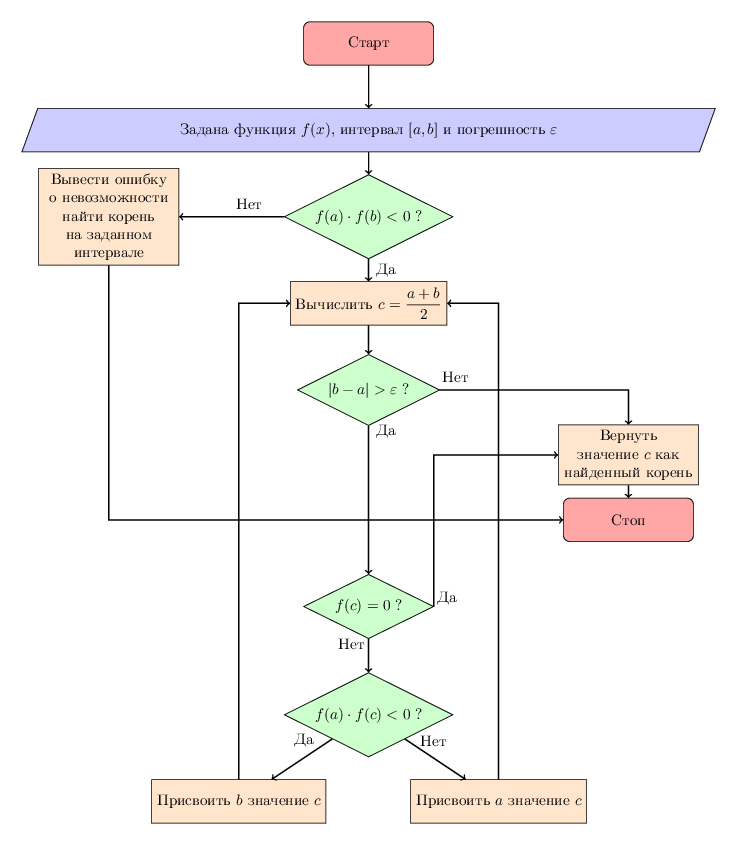

In [14]:
from wand.image import Image as WImage
blockscheme = WImage(filename='img/dichotomy_blockscheme.pdf', 
                     resolution=110)
blockscheme